In [1]:
import numpy as np 
import pandas as pd 
from keras.utils import to_categorical
import numpy as np
import pandas as pd
# not using, from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
#from keras.utils import np_utils
from keras.optimizers import SGD

data_train = pd.read_csv("C:/Users/User/Documents/CI 1/CA 1/fashion-mnist_train.csv")
data_test = pd.read_csv("C:/Users/User/Documents/CI 1/CA 1/fashion-mnist_test.csv")



Using TensorFlow backend.


In [2]:
#matrix size
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)


X_train = np.array(data_train.iloc[:, 1:])
#set the target variable y into categorical so the value has no relationship
y_train = to_categorical(np.array(data_train.iloc[:, 0]))

#not in use
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

#reshape to convert all rows into an array/ matrix
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
#X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
#X_val /= 255

In [3]:
# -- Initializing the values for the convolution neural network

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [4]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=input_shape))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2769024   
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, batch_size=batch_size, 
          epochs=50,verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 53s 879us/step - loss: 0.4518 - acc: 0.8396 - val_loss: 0.4269 - val_acc: 0.8554
Epoch 2/50
60000/60000 [==============================] - 56s 930us/step - loss: 0.4247 - acc: 0.8486 - val_loss: 0.4088 - val_acc: 0.8549
Epoch 3/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.4045 - acc: 0.8555 - val_loss: 0.3982 - val_acc: 0.8575
Epoch 4/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.3876 - acc: 0.8616 - val_loss: 0.4012 - val_acc: 0.8559
Epoch 5/50
60000/60000 [==============================] - 65s 1ms/step - loss: 0.3734 - acc: 0.8670 - val_loss: 0.4521 - val_acc: 0.8284
Epoch 6/50
60000/60000 [==============================] - 65s 1ms/step - loss: 0.3602 - acc: 0.8707 - val_loss: 0.4332 - val_acc: 0.8374
Epoch 7/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3500 - acc: 0.8741 - val_loss: 0.3648 - val

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

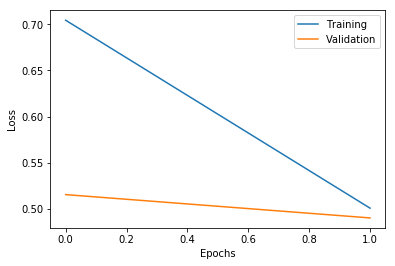

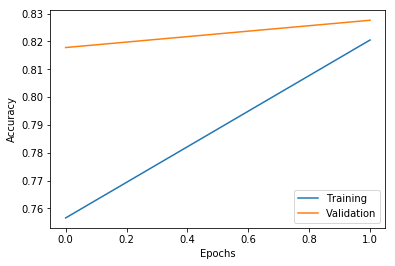

In [9]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [11]:
#evaluation

print('Available Metrics in Model: {}'.format(model.metrics_names))


# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Available Metrics in Model: ['loss', 'acc']
Test Loss: 0.490181623507
Test Accuracy: 0.8276
